In [47]:
import pandas as pd
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import plot_tree
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [ ]:
# TODO NORMALIZE BY COUNTS GET ACTUAL COUNTS

In [2]:
# HIV
db = pd.read_csv("reports/grep_counts_tables/hiv_counts.tsv", sep="\t", comment='#', header=0)
db['sample'] = db['%'].str.split('.', expand=True)[0]

# Everything = bacteria + virus
db_all = pd.read_csv("reports/grep_counts_tables/species_list.tsv", sep="\t", comment='#', header=0)
db_all['sample'] = db_all['%'].str.split('.', expand=True)[0]

# all virus
db_virus = pd.read_csv("reports/grep_counts_tables/virus_list.tsv", sep="\t", comment='#', header=0)
db_virus['sample'] = db_virus['%'].str.split('.', expand=True)[0]

metadata = pd.read_csv('/data/CARD/AD/AMP_AD/jointGenotypingROSMAPMayoRNAseqMSBB/threeCohorts.csv')

In [3]:
joined_db_hiv = metadata.merge(db, how='inner', left_on='rna_id', right_on='sample')

In [5]:
joined_db_hiv = joined_db_hiv[joined_db_hiv['cohort'] == 'ROSMAP']

In [6]:
# Make sure can correlate even if not there
joined_db_hiv.loc[:,'clinAD'] = joined_db_hiv.loc[:,'clinAD'].fillna(0)
joined_db_hiv.loc[:,'braaksc'] = joined_db_hiv.loc[:,'braaksc'].fillna(0)

In [7]:
joined_db_hiv.groupby('clinAD').count()

,cohort,wgs_id,rna_id,female,age_death,coglev,apoe,braaksc,thal,Ax,...,%,reads,taxReads,kmers,dup,cov,taxID,rank,taxName,sample
clinAD,,,,,,,,,,,,,,,,,,,,,
0.0,29,25,29,29,29,29,29,29,0,29,...,29,29,29,29,29,29,29,29,29,29
1.0,24,22,24,24,24,24,24,24,0,24,...,24,24,24,24,24,24,24,24,24,24


In [8]:
#scipy.stats.chisquare(, f_exp=None, ddof=0, axis=0)

In [9]:
db_virus_piv = db_virus.pivot(index='sample', columns='taxName', values='taxReads')

In [10]:
joined_db_virus = metadata.merge(db_virus_piv, how='right', left_on='rna_id', right_on='sample')
joined_db_virus = joined_db_virus[joined_db_virus['cohort'] == 'ROSMAP']

In [11]:
# Checking to make sure all the samples are there
metadata[metadata['cohort'] == 'ROSMAP'].rna_id.notna().sum()

632

In [12]:
# Apparently missing some metadata
joined_db_virus

,cohort,wgs_id,rna_id,female,age_death,clinAD,coglev,apoe,braaksc,thal,...,Woodchuck hepatitis virus,Lactobacillus virus LP65,Pandoravirus quercus,Sclerophthora macrospora virus A,Hubei tombus-like virus 2,Hubei tombus-like virus 3,Autographa californica multiple nucleopolyhedrovirus,Choristoneura fumiferana granulovirus,Torque teno virus 24,Elicom virus 1
0,ROSMAP,SM-CTEFX,01_120405,1.0,75.036276522929498,0.0,Dementia,33.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ROSMAP,SM-CJIWX,02_120405,1.0,90+,1.0,Dementia,24.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ROSMAP,SM-CJK43,03_120405,1.0,90+,0.0,NCI,33.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ROSMAP,NaN,04_120405,1.0,90+,0.0,NCI,23.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ROSMAP,SM-CJIXW,05_120405,1.0,87.301848049281318,0.0,MCI,33.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,ROSMAP,SM-CJGHO,96_120417,1.0,89.793292265571523,0.0,NCI,34.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,ROSMAP,SM-CTEGF,97_120417,1.0,84.347707049965777,1.0,Dementia,33.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,ROSMAP,NaN,98_120417,1.0,88.599589322381931,0.0,MCI,33.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,ROSMAP,SM-CJIXB,R24_131017,0.0,86.35455167693361,1.0,Dementia,33.0,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# In case a mistake is made down the road
virus_backup = joined_db_virus.copy(deep=True)

In [14]:
# Same as above
joined_db_virus = virus_backup.copy(deep=True)

In [15]:
# Make sure can correlate even if not there
# If NaN then it was not detected so make it zero
joined_db_virus = joined_db_virus.fillna(0)

# Select relevant columns for this analysis
# Just for this initial time to make it easy we are just going to toss categorical variables unless already converted
joined_db_virus = joined_db_virus.drop(columns=['cohort', 'wgs_id', 'age_death', 'coglev', 'thal', 'Ax', 'Bx', 'Cx',
                                               'NIA_AA'])
# For just doing a random forest regression so we will remove a few more potential y variables
joined_db_virus = joined_db_virus.drop(columns=['clinAD', 'NIA_RI'])

joined_db_virus.set_index('rna_id', inplace=True)

In [18]:
y = joined_db_virus['braaksc']
X = joined_db_virus.drop(columns=['braaksc'])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [24]:
import numpy as np
def plot_decision_boundaries(X, y, model):

    # adapted from https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Utilities/ML-Python-utils.py
    
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolor="k")
    plt.show()

def plot3D(X, y, mod=None):
    # code adapted from https://stackoverflow.com/questions/51278752/visualize-2d-3d-decision-surface-in-svm-scikit-learn

    z = lambda x,y: (-mod.intercept_[0]-mod.coef_[0][0]*x -mod.coef_[0][1]*y) / mod.coef_[0][2]

    tmp = np.linspace(-1,1,30)
    xx,yy = np.meshgrid(tmp,tmp)

    fig = plt.figure(figsize=(8, 8))
    ax  = fig.add_subplot(111, projection='3d')
    ax.plot3D(X['x1'][y==0], X['x2'][y==0], X['sq'][y==0],'o', c='purple')
    ax.plot3D(X['x1'][y==1], X['x2'][y==1], X['sq'][y==1],'oy')
    if mod:
        ax.plot_surface(xx, yy, z(xx,yy), alpha=0.5)
    ax.view_init(30, 60)
    plt.show()

np.random.seed(0) # ensure consistent results

In [32]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)


RandomForestRegressor(max_depth=2, random_state=0)

In [38]:
prediction = regr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5

In [39]:
# Not great results. But not unexpected either
print(mse)
print(rmse)

1.3137750081615667
1.1462002478457098


In [40]:
joined_db_virus.braaksc.describe()

count    595.000000
mean       3.529412
std        1.224219
min        0.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        6.000000
Name: braaksc, dtype: float64

In [46]:
result = permutation_importance(
    regr, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

In [50]:
forest_importances = pd.Series(result.importances_mean, index=X_train.columns)

/tmp/ipykernel_2462130/3497384957.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


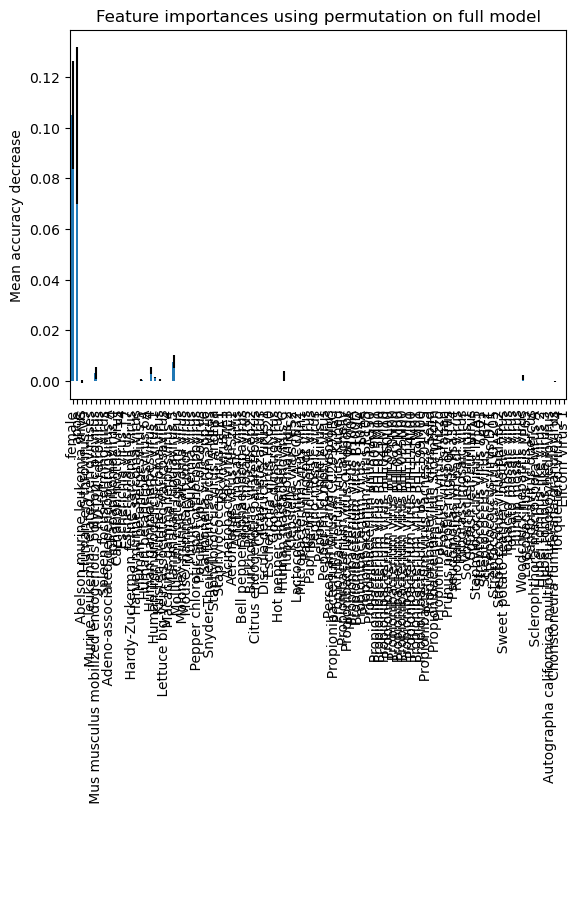

In [51]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()